 ## Análise de dados do Spotify e Youtube

## Integrantes: 

- Daniele Laís Reis da Silva
- Geovanna Sandy 
- Matheus Bruno 

## Introdução

#### Motivações e objetivos 


#### **Objetivo geral**

- Apresentar e analiar os dados do Spotify e Youtube de forma a explorar várias formas da música utilizando variáveis como: Danceability, tempo(BPM), acousticness, instrumentalness, liveness, valence, views, likes e os demais apresentados ao decorrer do projeto para que ao final da análise exploratória, possamos obter informações coerentes, possíveis novidades e perguntas respondidas. 

#### **Objetivo específico**

- Analisar de que forma a duração de uma música está relacionada com o número de streams que ela recebeu;
- Descobrir se no geral, singles fazem mais sucesso do que álbuns;
- Compreender se o fato de uma música ser considerada dançável tem ligação com o seu BPM;
- Explicar se existe uma correlação entre o Speechiness e o Instrumentalness? Se sim, de que maneira ela se comporta;
- Analisar a itensidade de uma música está, de alguma forma, relacionada com a sua energia;
- Entender qual a correlação entre a "dançabilidade" de uma música e a sua valência;

### Bibliotecas utilizadas

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Dados manuseados

Os dados foram obtidos no Kaggle e serviram como base para todo o projeto. Inclui 26 variáveis ​​para cada uma das músicas coletadas do Spotify. Sendo elas:

**EDITAR : 

Faixa : nome da música, conforme visível na plataforma Spotify.
Artista : nome do artista.
Url_spotify : a URL do artista.
Álbum : o álbum em que a música está contida no Spotify.
Album_type : indica se a música foi lançada no Spotify como single ou contida em um álbum

//Precisa adicionar o data set na parte de dados manuseados pra no resto do notebook poder ser utilizado

In [3]:
df_spotify_youtube = pd.read_csv("../Projeto_ICD-Analise_de_Dados_do_Spotify_e_Youtube/Spotify_Youtube.csv")

In [11]:
sns.set_palette('pastel')

# Perguntas

Do início ao fim do Projeto, diversas perguntas surgiram relacionadas aos dados que estavam sendo manuseados e explorados, neste tópico, portanto, iremos exibí-las e demonstrar os caminhos que utilizamos para responder à esses questionamentos.

### 1 - De que forma a duração de uma música está relacionada com o número de streams que ela recebeu?

Para responder essa pergunta, é necessário analisarmos o gráfico de dispersão das colunas "Duration_ms" e "Stream" juntamente com a sua matriz-correlação

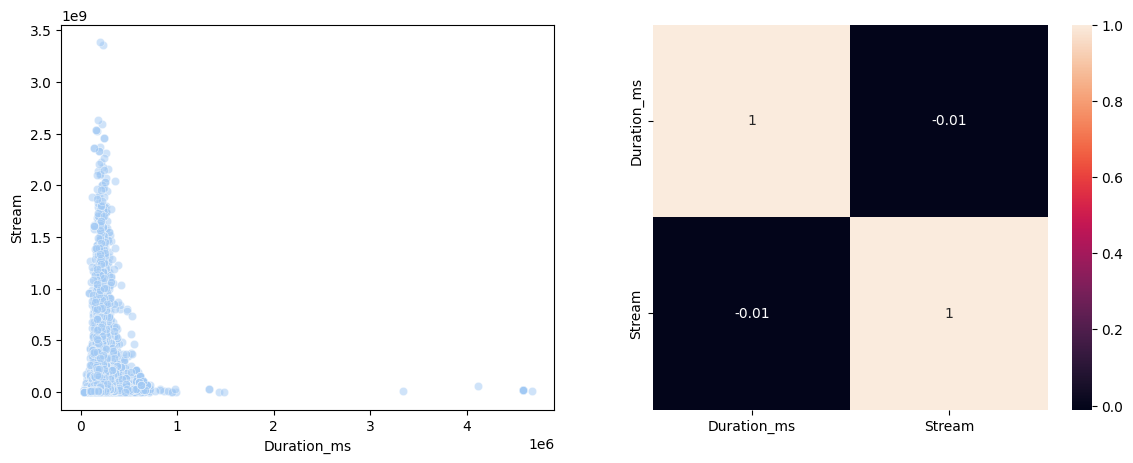

In [25]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df_spotify_youtube,y='Stream',x='Duration_ms',alpha=0.5)

correlacao_matriz_a = df_spotify_youtube[['Duration_ms','Stream']].corr()

plt.subplot(1,2,2)
sns.heatmap(correlacao_matriz_a, annot=True,)

plt.show()

Pode-se perceber, através da análise do gráfico, que não existe uma correlação forte entre as duas colunas, os valores da coluna Duration_ms estão concentrados entre 0 e 1, entretanto, os valores da coluna Stream estão bem dispersos em relação ao eixo-Y. Esta ausência de correlação fica ainda mais explícita quando analisamos a matriz-correlação, onde nos é proporcionado o valor de **-0.01**, implicando que **não existe uma relação entra a duração de uma música com a sua quantidade de streams**, tendo em vista que é um valor muito proximo do 0.

### 2 - No geral, singles fazem mais sucesso do que álbuns?

Para responder a essa pergunta, é necessário somar a quantidade de streams que músicas do tipo album receberam e comparar esta soma com quantidade de streams que músicas do tipo single receberam, esta comparação pode ser feita matematicamente e graficamente 

In [48]:
df_album = df_spotify_youtube[df_spotify_youtube['Album_type'] == 'album']
soma_streams_album = df_album['Stream'].sum()

df_single = df_spotify_youtube[df_spotify_youtube['Album_type'] == 'single']
soma_streams_single = df_single['Stream'].sum()

soma_streams_album > soma_streams_single

np.True_

Text(0, 0.5, 'Stream')

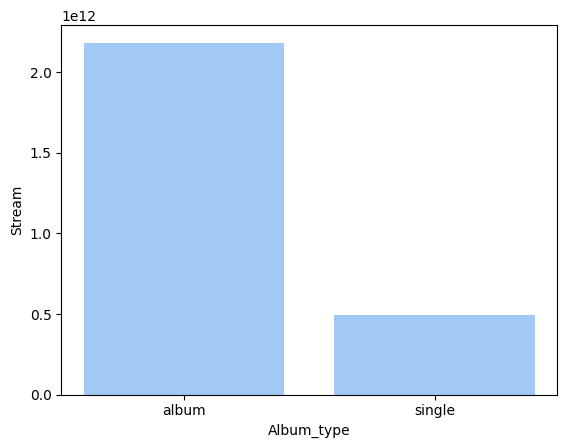

In [47]:
labels = ['album', 'single']
valores = [soma_streams_album, soma_streams_single]

plt.bar(labels, valores)

plt.xlabel('Album_type')
plt.ylabel('Stream')

Através da análise gráfica, podemos perceber que **albuns recebem muito mais streams que singles**, isso é facilmente explicado pelo simples fato de que albuns são conjuntos de músicas, incluindo os próprios singles, portanto, **albuns sempre terão uma quantidade de streams maior que singles desde que os singles estejam inclusos no álbum**.

### 3 - Quais valores de **Acousticness**, **Speechiness** e **Liveness** mais aparecem? O que eles representam?

Para responder a essa pergunta, precisamos construir um gráfico de frequência (histograma) e observar quais valores mais se repete entre cada uma das colunas citadas, após isso, é necessário analisar o que esses valores significam para uma música 

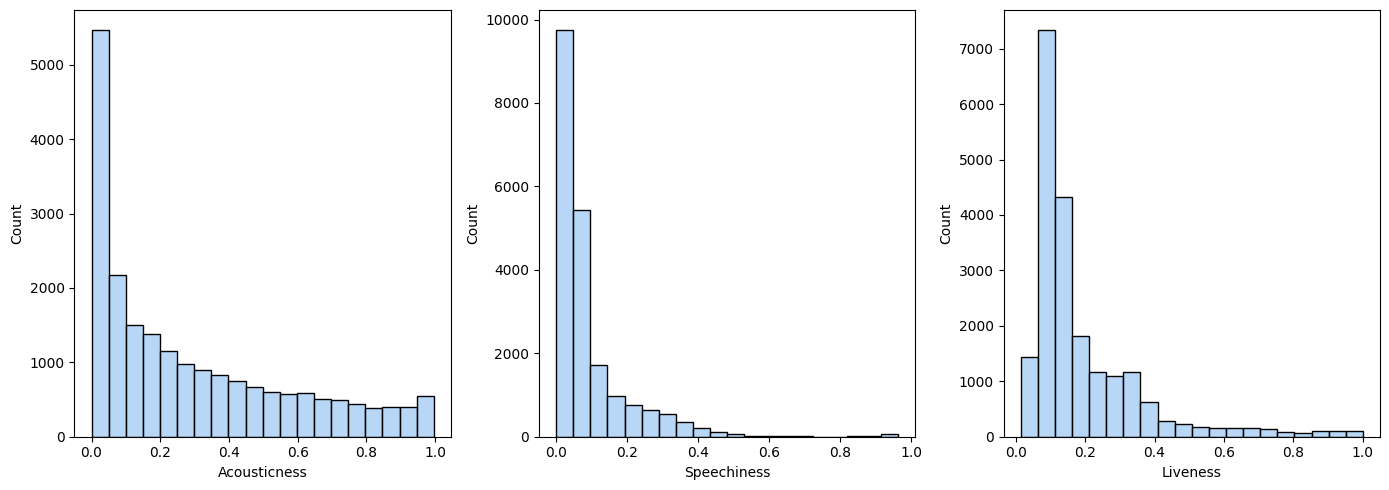

In [83]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.histplot(data=df_spotify_youtube,x="Acousticness",bins=20)

plt.subplot(1,3,2)
sns.histplot(data=df_spotify_youtube,x="Speechiness",bins=20)

plt.subplot(1,3,3)
sns.histplot(data=df_spotify_youtube,x="Liveness",bins=20)

plt.tight_layout()

Por meio da análise dos gráficos, pode-se concluir que tanto as colunas Acousticness e Speechiness tem valores que se repetem com mais frequência na faixa de 0.0 a 0.05, já a coluna Liveness tem valores que se repetem com mais frequência na faixa de 0.05 a 0.1. No geral, **os valores das três colunas se repetem com mais frequência entre 0.0 a 0.2**, o que significa que **as músicas, em sua maioria, não são acústicas, apresentam poucos elementos de fala** (como palavras recitadas/faladas ao invés de cantadas) **e que não são gravadas com a presença de uma plateia e/ou peformadas ao vivo**.

### 4 - A amplitude de uma música está, de alguma forma, relacionada com a sua energia?

Para responder essa pergunta, é necessário analisarmos o gráfico de dispersão das colunas "Loudness" e "Energy" juntamente com a sua matriz-correlação

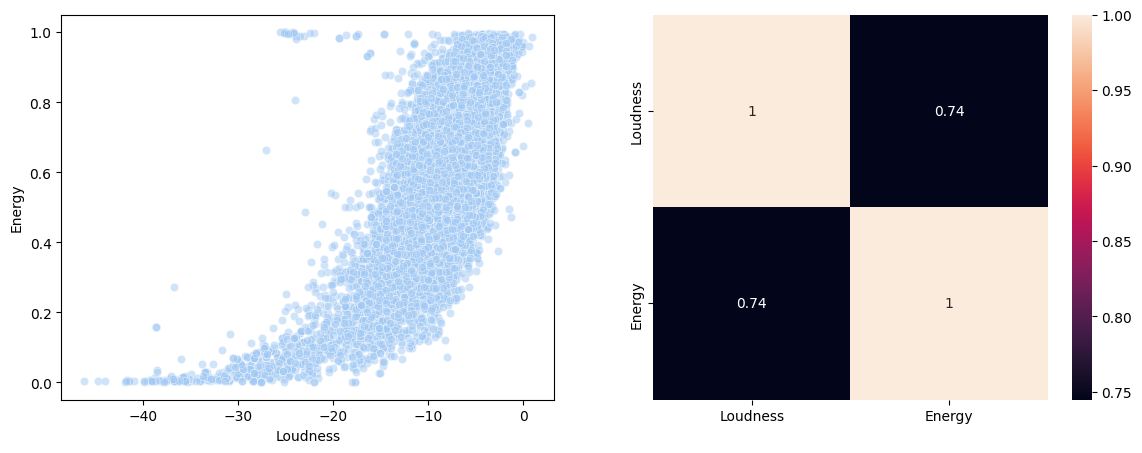

In [82]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df_spotify_youtube,x='Loudness',y='Energy',alpha=0.5)

correlacao_matriz_x = df_spotify_youtube[['Loudness','Energy']].corr()

plt.subplot(1,2,2)
sns.heatmap(correlacao_matriz_x, annot=True,)

plt.show()

Pode-se perceber, através da análise do gráfico, que existe uma forte correlação entre as duas colunas. De acordo que os valores da coluna Loudness crescem, os valores da coluna Energy também aumentam, o que está representado, no gráfico, por uma curva crescente da esquerda para a direita. Esta correlação fica evidente quando analisamos a matriz-correlação, onde nos é proporcionado o valor de **0.74**, implicando que **existe uma relação entra a amplitude de uma música com a sua intensidade/energia**, tendo em vista que é um valor muito proximo de 1.

### 5- A coluna **Energy** possui outliers? Se sim, o que podemos dizer sobre eles? Possuem alguma semelhança?

Para responder a essa pergunta, é necessário construir o boxplot da coluna Energy e identificar se existem outliers, observando a faixa de valores que os mesmos se encontram, para assim analisá-los

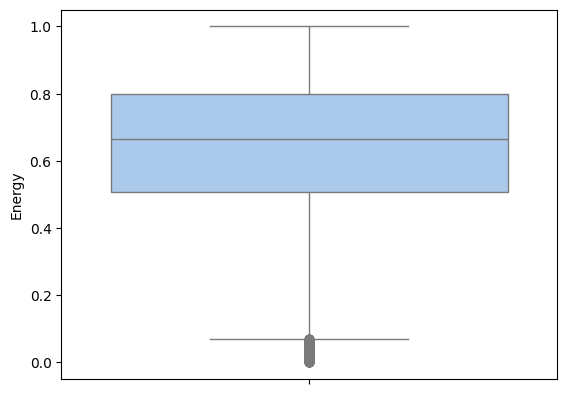

In [61]:
sns.boxplot(data= df_spotify_youtube['Energy'])
plt.show()

In [85]:
quartil_um = df_spotify_youtube['Energy'].quantile(0.25)
quartil_tres = df_spotify_youtube['Energy'].quantile(0.75)
intervalo_int_quartil = quartil_tres - quartil_um
limite_inferior = quartil_um - 1.5 * intervalo_int_quartil

outliers = df_spotify_youtube[df_spotify_youtube['Energy'] <= limite_inferior]

A partir da análise do gráfico, podemos perceber que **existem 364 outliers na coluna Energy**, além disso, pode-se dizer que **todos possuem valores muito baixos de intensidade/energia** e se caracterizam por:

- Sons para dormir, como **barulhos de chuva**, **sons de trafego em cidades grandes**, **barulhos de ondas do mar** e **sons de floresta**
- Músicas para **meditação/relaxar**
- Músicas **instrumentais**, sendo elas **clássicas/orquestrais/sinfônicas** e/ou que fazem parte da **soundtrack de jogos e filmes**

### 6 - Existe um agrupamento se oganizarmos os dados de acordo com o seu **Loudness** e a sua **Energy**? De que forma esse agrupamento está distribuído?

Para responder a essa pergunta, precisamos aplicar o K-means ao gráfico de dispersão das colunas Loudness e Energy e identificar características e semelhanças entre os membros dos grupos formados

<Axes: xlabel='Loudness', ylabel='Energy'>

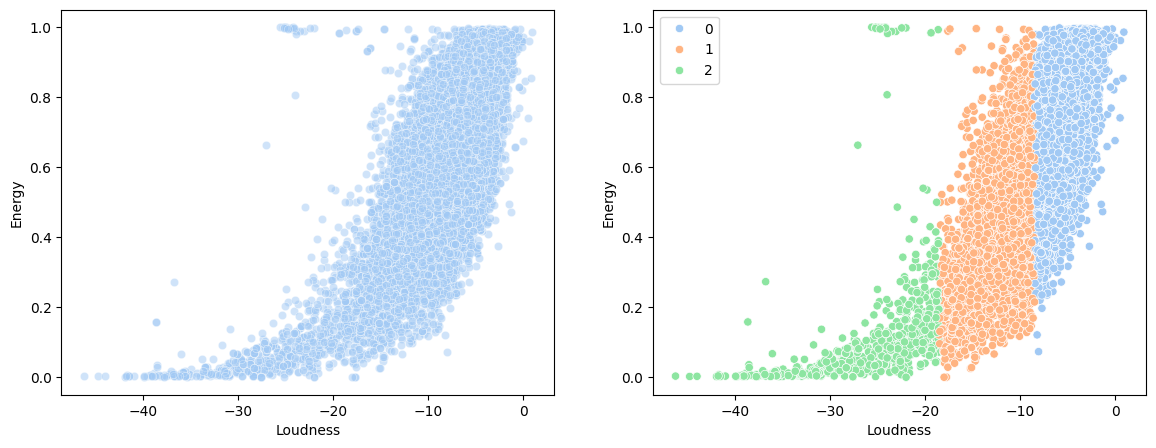

In [84]:
df_loud_energy = df_spotify_youtube[['Loudness','Energy']]
df_loud_energy = df_loud_energy.fillna(df_loud_energy.mean())

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_loud_energy)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_spotify_youtube,x='Loudness',y='Energy',alpha=0.5)

plt.subplot(1,2,2)
sns.scatterplot(data=df_loud_energy, x='Loudness', y='Energy', hue=kmeans.labels_, palette='pastel')

Sim, **existe um agrupamento ao organizarmos os dados de acordo com o seu Loudness e a sua Energy**. A partir da análise desses grupos formados, pode-se concluir que:
- No **Grupo 2 - Verde** percebe-se uma concentração de **músicas clássicas, sinfônicas** e/ou **orquestrais**, em decorrência da baixa amplitude e intensidade dos elementos musicais que as envolvem, além de artistas voltados ao classicismo, como **Frédéric Chopin**, **Franz Schubert**, **Wolfgang Amadeus Mozart** e **London Symphony Orchestra**.

- No **Grupo 1 - Laranja** nota-se um conjunto de músicas com instrumentais mais leves e relacionadas aos gêneros **Jazz**, **Soft Rock**, **Country**,**Rock Pop** e **Alternative Rock** que, em sua maioria, pertencem a artistas da década de 40-90, como por exemplo, **Fleetwood Mac**, **The Beatles**, **Frank Sinatra**, **Elthon John**, **Elvis Presley** e **Red Hot Chili Peppers**.

- No **Grupo 0 - Azul** é possível identificar a presença de músicas com instrumentais e vocais mais pesados, devido ao uso frequente de sintetizadores e samplers, sendo a sua maior parte músicas do gênero **Rip-Hop**, **Rap**, **Heavy Metal**, **Hard Rock**, **Pop** e **Eletrônica**. Alguns artistas presentes que podem ser citados são: **Gorillaz**, **50 cent**, **Black Eyed Pies**, **AC/DC**, **Linkin Park**, **Daft Punk** e **Shakira**.

### 7 - Ao agruparmos os dados de acordo com as suas **Views** e os seus **Likes**, podemos encontrar algum grupo que se destaque? Que informações podemos extrair desse grupo?

Para responder a essa pergunta, precisamos aplicar o K-means ao gráfico de dispersão das colunas Views e Likes, identificar algum grupo formado que se destaque e observar características e semelhanças entre os membros desse determinado grupo

<Axes: xlabel='Views', ylabel='Likes'>

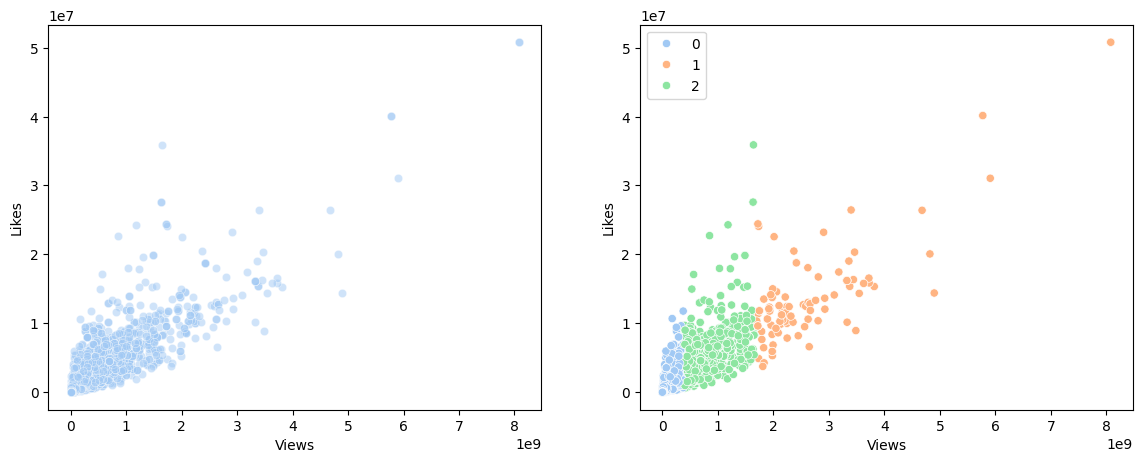

In [90]:
df_views_likes = df_spotify_youtube[['Views','Likes']]
df_views_likes = df_views_likes.fillna(df_views_likes.mean())

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_views_likes)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_spotify_youtube,x='Views',y='Likes',alpha=0.5)

plt.subplot(1,2,2)
sns.scatterplot(data=df_views_likes, x='Views', y='Likes', hue=kmeans.labels_, palette='pastel')

Através da análise do gráfico, pode-se perceber que **existe um grupo que se destaca entre os três grupos formados**, sendo ele o **Grupo 1 - Laranja**. Neste grupo formado por 112 membros, encontram-se **músicas que fizeram sucessos estrondosos e viralizaram em todo o mundo**, as quais possuem mais de **1,6 bilhão de visualizações** e, em sua maioria, são do **gênero Pop**, destacando-se algumas músicas infantis como **Wheels on the Bus**, **Baa Baa Black Sheep** e **Baby Shark**.